# STRAT read analysis

In [1]:
path = '/opt/data/workdir/bc6_7.guppy.ontarget.tsv'

In [2]:
import common as c

In [3]:
df = c.load(path, c.COLUMNS)

In [4]:
df.head(2)

,direction,id,prefix_flank,ins,suffix_flank,prefix_flank_q,ins_q,suffix_flank_q
0,fwd,@85ef1b02-6b0d-4f9e-996a-cdf0b0cdebb7,GTGATCCCCC,CAGCAGCAGCAGCA,GCATTCCCGC,99<882017A,CBCFEHEFIH??><,<<<=6000+(
1,fwd,@7a4594f2-aa00-4115-9f0a-1eec8a3548b4,GTGATCCCCC,CAGCAGCAGCA,GCAGCATTCC,FB888+**-7,CACE=<<<@@@,BCAFBAB@@B


In [5]:
df = c.lengths(df, ['ins'], ['len_ins'])

In [6]:
cond = df['len_ins'] > 300
df = df[cond]

<Axes: xlabel='len_ins', ylabel='Count'>

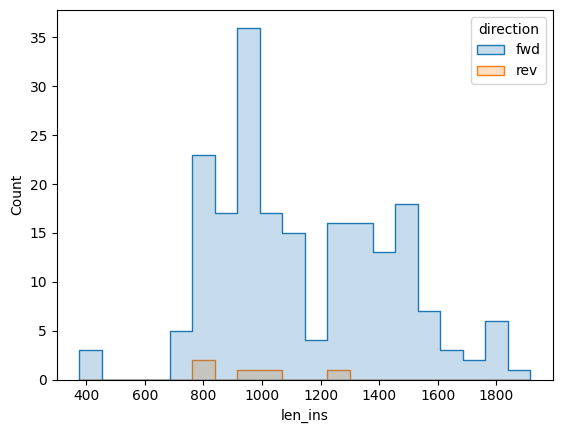

In [7]:
c.sns.histplot(data=df, x='len_ins', hue='direction', element="step", stat="count", common_norm=False, bins=20)

In [8]:
df = c.pd.concat([df, df.apply(lambda x: c.pd.Series(c.freqs(x['ins'], 'ACGT')), axis=1)], axis=1)

In [9]:
df.head(2)

,direction,id,prefix_flank,ins,suffix_flank,prefix_flank_q,ins_q,suffix_flank_q,len_ins,A,C,G,T
254,fwd,@9d2c7514-bd84-4c42-8f66-8027a714fa87,GTGATCCCCC,CAGCAGCAGCAGCAGCAGCAGCAGCAGCAGCGGCGCGGCGCAGCGG...,GCAGCATCCA,0-9684422=,">2...55444122-,,*******,,+,,)(&%''(''))(%'-/07...",22....0&&3,889,88,358,443,0
376,fwd,@351ef4ac-766b-47fc-83f9-5a6c83997440,GTGATCCCCA,GCAGCAGCAGCAGCAGCAGCAGCAGCAGCAGCAGCAGCAGCAGCAG...,CGGCGTTCCG,"%%%%(/,8;<",DMKINRI{OMHNIFK{{LPGKUPHJEGKKLJFNI{LIHLMOTF{NI...,''00***)-',1352,582,449,320,1


In [10]:
df['AT'] = df.apply(lambda x: (x['A'] + x['T']) / x.len_ins, axis=1)

array([[<Axes: title={'center': 'AT'}>]], dtype=object)

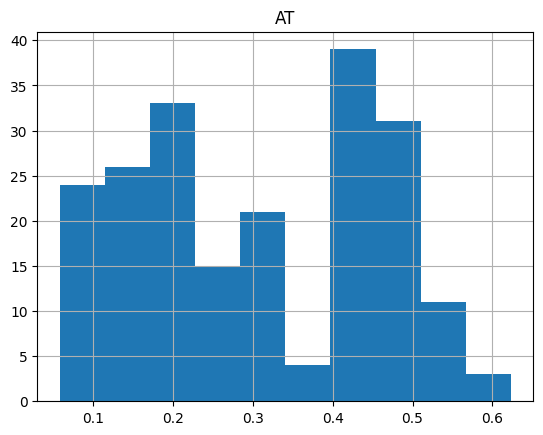

In [11]:
df.hist('AT', bins=10)